## Category based Incident Trends Analysis (Flag 11)

### Dataset Description
The dataset comprises 500 entries simulating ServiceNow incidents table, detailing various attributes such as category, state, open and close dates, involved personnel, and incident specifics like location, description, and priority. It captures incident management activities with fields like 'opened_at', 'closed_at', 'assigned_to', 'short_description', and 'priority', reflecting the operational handling and urgency of issues across different locations and categories.


### Your Task
**Goal**: Analyze the incident data to identify trends and underlying causes for the increasing resolution time in certain category.

**Role**: L2 Engineering Manager

**Difficulty**: 4 out of 5. This analysis requires comprehensive data examination and trend analysis to understand the dynamics affecting incident resolution times and to devise effective transformation functions.

**Category**: Incident Management



### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [1]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

## Load Dataset
This cell loads the dataset using pandas library. The dataset flag-11 is stored as a CSV file and is loaded into a DataFrame. This step includes reading the data from a file path and possibly performing initial observations such as viewing the first few rows to ensure it has loaded correctly.

In [2]:
dataset_path = "csvs/flag-11.csv"
df = pd.read_csv(dataset_path)
df.head()

,sys_updated_by,opened_at,location,category,closed_at,caller_id,state,number,assigned_to,sys_updated_on,closed_by,short_description,assignment_group,priority
0,system,2023-01-02 03:32:00,UK,Database,2023-01-03 03:32:00.000000000,ITIL User,Closed,INC0000000000,Howard Johnson,2023-01-03 03:32:00.000000000,Charlie Whitherspoon,Email system downtime affecting entire department,Service Desk,1 - Critical
1,employee,2023-01-02 21:55:00,UK,Hardware,2023-01-06 02:20:53.553597584,Bud Richman,Resolved,INC0000000001,Howard Johnson,2023-01-06 02:20:53.553597584,Howard Johnson,Email system outage impacting multiple users,Service Desk,1 - Critical
2,system,2023-01-03 20:25:00,Australia,Network,2023-01-10 00:00:26.438470379,David Loo,Closed,INC0000000002,Beth Anglin,2023-01-10 00:00:26.438470379,Beth Anglin,Email system downtime reported by multiple users,Service Desk,1 - Critical
3,admin,2023-01-05 19:06:00,United States,Network,2023-01-16 11:11:02.387196259,Bud Richman,Resolved,INC0000000003,Charlie Whitherspoon,2023-01-16 11:11:02.387196259,Fred Luddy,Email server outage impacting all users,Network,1 - Critical
4,system,2023-01-05 21:26:00,India,Network,2023-01-13 10:17:05.888858539,ITIL User,Resolved,INC0000000004,Charlie Whitherspoon,2023-01-13 10:17:05.888858539,Howard Johnson,Email system downtime affecting multiple users,Service Desk,2 - High


### **Question 1**: What is the trend in the time to resolution (TTR) for incidents across categories over the timeline?

#### Plot trend of TTR across categories over time
This cell creates a line plot to visualize the trends in the average Time to Resolution (TTR) across different incident categories over time. By examining TTR for each category, the plot provides insights into whether there any anomaly in TTR or if is a uniform trend across all categories or if it is more pronounced in specific ones.

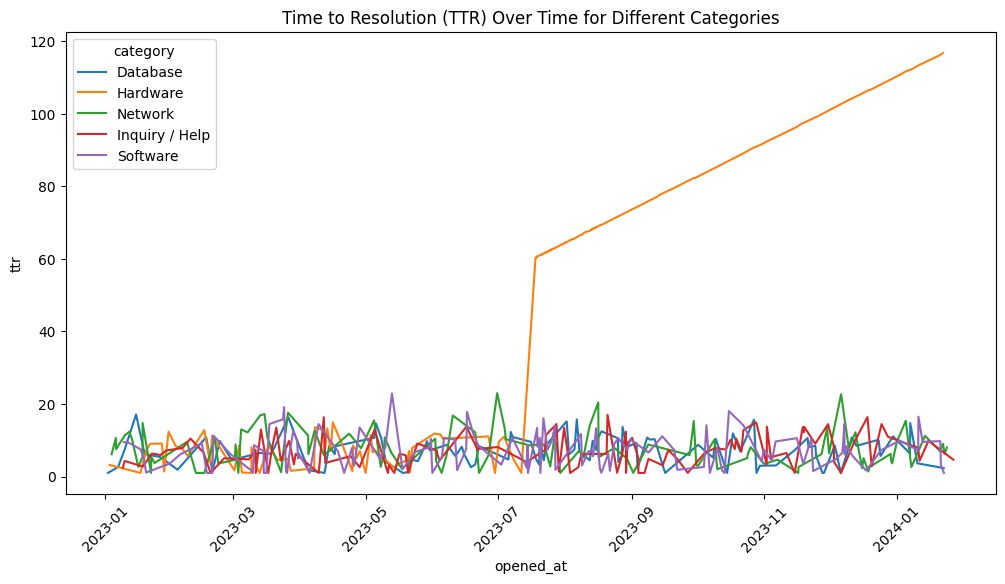

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
# Sort the DataFrame by the opened_at column
df = df.sort_values("opened_at")
df["opened_at"] = pd.to_datetime(df["opened_at"])
df["closed_at"] = pd.to_datetime(df["closed_at"])

# Create a new column 'month_year' to make the plot more readable
# df['month_year'] = df['opened_at'].dt.to_period('M')
df["ttr"] = (df["closed_at"] - df["opened_at"]).dt.total_seconds() / 86400
# Convert 'ttr' column to numeric and handle errors
df["ttr"] = pd.to_numeric(df["ttr"], errors="coerce")

# Create a lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="opened_at", y="ttr", hue="category")
plt.title("Time to Resolution (TTR) Over Time for Different Categories")
plt.xticks(rotation=45)
plt.show()

#### Generate JSON Description for the Insight

In [4]:
{
    "data_type": "descriptive",
    "insight": "There is a linear Increase in TTR for Hardware incidents suspiciously from a particular time period",
    "insight_value": {"x_val": "Anomaly Periods", "y_val": "Increased TTR from 2023-07"},
    "plot": {
        "plot_type": "line",
        "title": "TTR Trends for Hardware Incidents",
        "x_axis": {
            "name": "Time",
            "value": "Anomaly periods",
            "description": "This represents the specific anomaly periods identified."
        },
        "y_axis": {
            "name": "Time to Resolution",
            "value": "Dynamic based on data",
            "description": "This represents the time taken to resolve incidents, focusing on the Hardware category during anomaly periods."
        },
        "description": "The line graph demonstrates an increasing trend in the TTR for Hardware incidents from period 2023-07"
    },
    "question": "What is the trend in the time to resolution (TTR) for Hardware incidents, especially during the identified anomaly periods?",
    "actionable_insight": "Addressing the root causes of increased TTR during these periods could enhance overall service efficiency and customer satisfaction."
}

{'data_type': 'descriptive',
 'insight': 'There is a linear Increase in TTR for Hardware incidents suspiciously from a particular time period',
 'insight_value': {'x_val': 'Anomaly Periods',
  'y_val': 'Increased TTR from 2023-07'},
 'plot': {'plot_type': 'line',
  'title': 'TTR Trends for Hardware Incidents',
  'x_axis': {'name': 'Time',
   'value': 'Anomaly periods',
   'description': 'This represents the specific anomaly periods identified.'},
  'y_axis': {'name': 'Time to Resolution',
   'value': 'Dynamic based on data',
   'description': 'This represents the time taken to resolve incidents, focusing on the Hardware category during anomaly periods.'},
  'description': 'The line graph demonstrates an increasing trend in the TTR for Hardware incidents from period 2023-07'},
 'question': 'What is the trend in the time to resolution (TTR) for Hardware incidents, especially during the identified anomaly periods?',
 'actionable_insight': 'Addressing the root causes of increased TTR durin


### **Question 2**: How are incidents distributed across different categories over time?

#### Plot number of incidents created over time by category
This cell creates a count plot to visualize how incidents are distributed across different categories over time, providing insights into trends or any significant changes in the types of incidents reported. By tracking the distribution of incidents on a monthly basis, the plot helps identify how demands evolve and if which categories may require more attention at certain times.

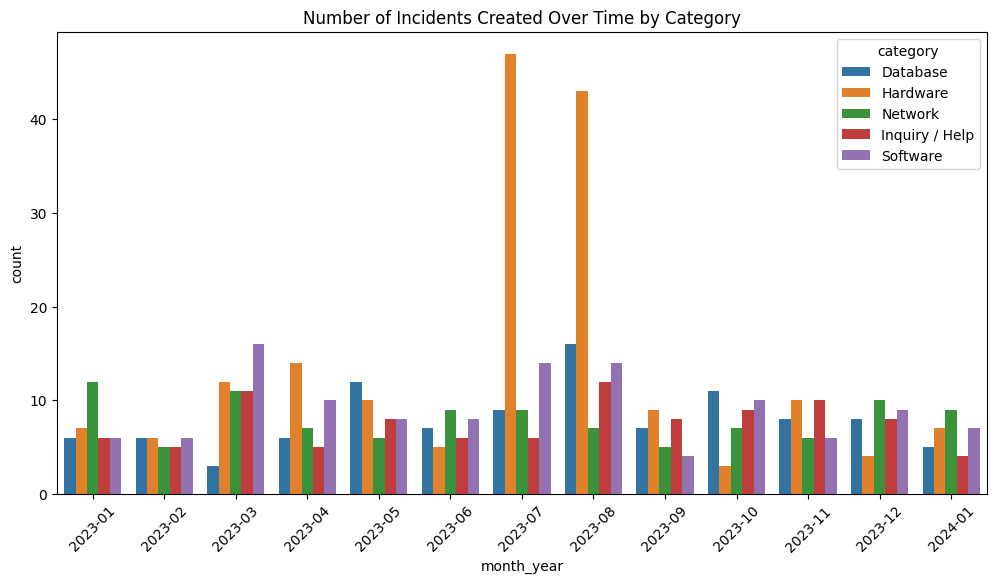

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Put the data into a DataFrame

# Sort the DataFrame by the opened_at column
df = df.sort_values("opened_at")
df["opened_at"] = pd.to_datetime(df["opened_at"])
df["closed_at"] = pd.to_datetime(df["closed_at"])
# Create a new column 'month_year' to make the plot more readable
df["month_year"] = df["opened_at"].dt.to_period("M")

# Create a countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="month_year", hue="category")
plt.title("Number of Incidents Created Over Time by Category")
plt.xticks(rotation=45)
plt.show()

#### Generate JSON Description for the Insight

In [6]:
{
    "data_type": "descriptive",
    "insight": "There are fluctuations in incident frequencies across categories and Hardware incidents suddenly increased from 2023-06 to 2023-08",
    "insight_value": {"x_val": "Time", "y_val": "Incident Count"},
    "plot": {
        "plot_type": "line",
        "title": "Incident Distribution Over Time by Category",
        "x_axis": {
            "name": "Time",
            "value": "2023-01-01 to 2024-02-01",
            "description": "This represents the timeline of the data collected."
        },
        "y_axis": {
            "name": "Number of Incidents",
            "value": "Dynamic based on data",
            "description": "This represents the number of incidents occurring over time for each category."
        },
        "description": "The line graph shows the trend of incidents over time, divided by categories. It highlights periods with unusually high activity, particularly in the Hardware category. for periods between 2023-06 to 2023-08 the cases are 4 times more than the average. This could indicate a potential issue that needs to be addressed."
    },
    "question": "How are incidents distributed across different categories over time?",
    "actionable_insight": "Identifying specific times with high incident rates can help in preemptive resource allocation and readiness for handling spikes."
}

{'data_type': 'descriptive',
 'insight': 'There are fluctuations in incident frequencies across categories and Hardware incidents suddenly increased from 2023-06 to 2023-08',
 'insight_value': {'x_val': 'Time', 'y_val': 'Incident Count'},
 'plot': {'plot_type': 'line',
  'title': 'Incident Distribution Over Time by Category',
  'x_axis': {'name': 'Time',
   'value': '2023-01-01 to 2024-02-01',
   'description': 'This represents the timeline of the data collected.'},
  'y_axis': {'name': 'Number of Incidents',
   'value': 'Dynamic based on data',
   'description': 'This represents the number of incidents occurring over time for each category.'},
  'description': 'The line graph shows the trend of incidents over time, divided by categories. It highlights periods with unusually high activity, particularly in the Hardware category. for periods between 2023-06 to 2023-08 the cases are 4 times more than the average. This could indicate a potential issue that needs to be addressed.'},
 'quest

### **Question 3**: During which periods do we observe spikes in incident reports, particularly in the Hardware category?

#### Plot number of hardware incidents over time
Building on the analysis of incident distribution across categories over time (Q2), this cell zooms into the Hardware category to specifically identify periods with spikes in incident reports. The visualization tracks the number of Hardware incidents reported each month, highlighting any significant increases that could suggest issues with hardware systems or related processes. 

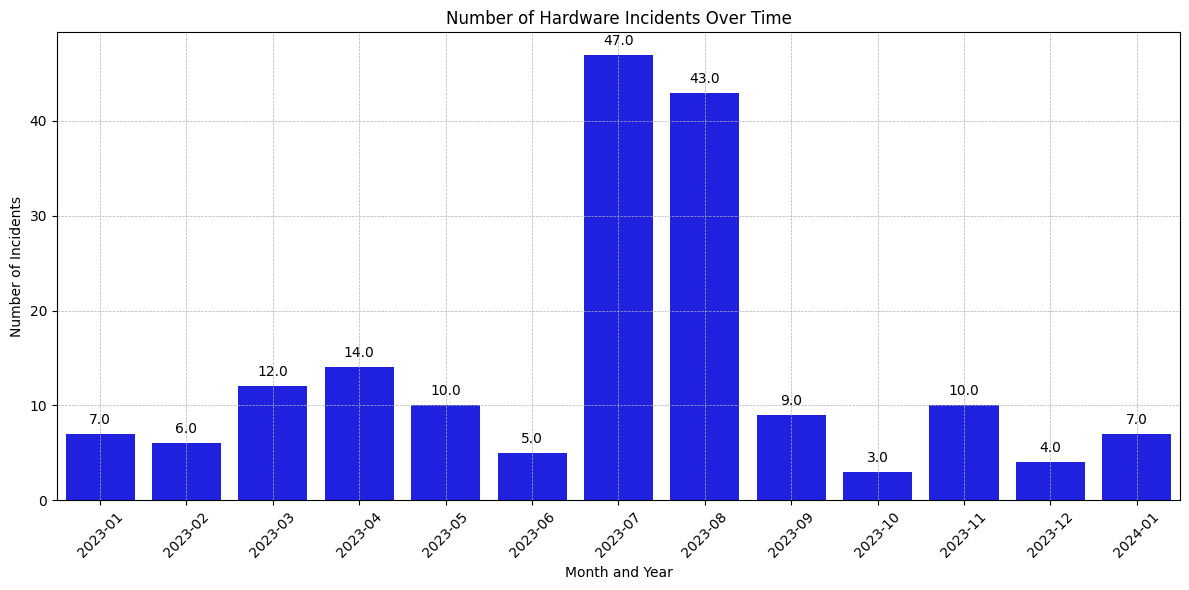

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is already loaded and sorted by 'opened_at' as in the previous code

# Filter the DataFrame to include only Hardware incidents
hardware_df = df[df['category'] == 'Hardware']

# Create a new DataFrame grouping by 'month_year' to count incidents in each period
hardware_counts = hardware_df.groupby('month_year').size().reset_index(name='counts')

# Create a bar plot to visualize the number of Hardware incidents over time
plt.figure(figsize=(12, 6))
plot = sns.barplot(data=hardware_counts, x='month_year', y='counts', color='blue')
# Loop through the rectangles (i.e., bars)
for i in plot.patches:
    # Get X and Y placement of label from rectangle
    x_value = i.get_x() + i.get_width() / 2
    y_value = i.get_height()

    # Use Y value as label and format number with one decimal place
    label = "{:.1f}".format(y_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, 5),              # Shift text slightly above bar
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally align label 
        va='bottom'                 # Vertically align label at bottom
    )
plt.title("Number of Hardware Incidents Over Time")
plt.xlabel("Month and Year")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

#### Generate JSON Description for the Insight

In [8]:
{
    "data_type": "descriptive",
    "insight": "There are specific time windows with elevated Hardware incidents",
    "insight_value": {"x_val": "Time Window", "y_val": "47, 43"},
    "plot": {
        "plot_type": "bar",
        "title": "Spikes in Hardware Incidents Over Time",
        "x_axis": {
            "name": "Time Window",
            "value": ["2023-07", "2023-08"],
            "description": "This represents specific time windows identified with high incident rates."
        },
        "y_axis": {
            "name": "Number of Incidents",
            "value": [47, 43],
            "description": "This represents the count of Hardware incidents in each identified time window."
        },
        "description": "The bar graph identifies specific periods where Hardware incidents spike significantly, warranting further investigation. average is 6 incidents per month, but in 2023-06 to 2023-08 the cases are 4 to 5 times more than the average."
    },
    "question": "During which periods do we observe spikes in incident reports, particularly in the Hardware category?",
    "actionable_insight": "Focusing on these high-activity periods can guide targeted troubleshooting and preventive measures."
}

{'data_type': 'descriptive',
 'insight': 'There are specific time windows with elevated Hardware incidents',
 'insight_value': {'x_val': 'Time Window', 'y_val': '47, 43'},
 'plot': {'plot_type': 'bar',
  'title': 'Spikes in Hardware Incidents Over Time',
  'x_axis': {'name': 'Time Window',
   'value': ['2023-07', '2023-08'],
   'description': 'This represents specific time windows identified with high incident rates.'},
  'y_axis': {'name': 'Number of Incidents',
   'value': [47, 43],
   'description': 'This represents the count of Hardware incidents in each identified time window.'},
  'description': 'The bar graph identifies specific periods where Hardware incidents spike significantly, warranting further investigation. average is 6 incidents per month, but in 2023-06 to 2023-08 the cases are 4 to 5 times more than the average.'},
 'question': 'During which periods do we observe spikes in incident reports, particularly in the Hardware category?',
 'actionable_insight': 'Focusing on t

### **Question 4**: Are there geographical patterns associated with the spikes in Hardware incidents?

#### Plot number of incidents created over time by location
Following the identification of spikes in Hardware incidents over time, this cell extends the analysis to explore geographical patterns associated with these spikes. The visualization examines whether specific locations are more frequently associated with increased incident reports, which may suggest localized issues or differing impacts of external factors

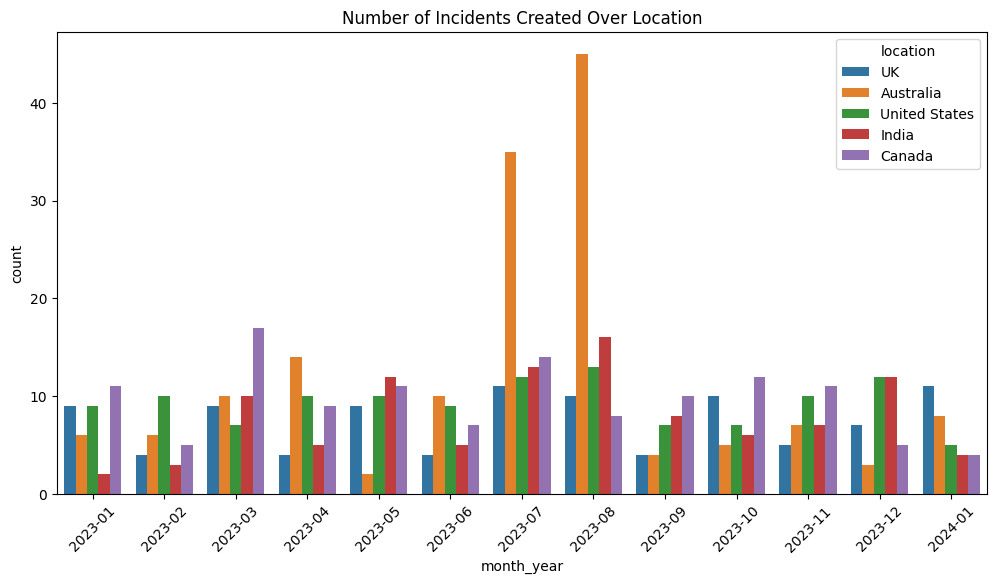

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt



# Sort the DataFrame by the opened_at column
df = df.sort_values("opened_at")

# Create a new column 'month_year' to make the plot more readable
df["month_year"] = df["opened_at"].dt.to_period("M")

# Create a countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="month_year", hue="location")
plt.title("Number of Incidents Created Over Location")
plt.xticks(rotation=45)
plt.show()

#### Generate JSON Description for the Insight

In [10]:
{
    "data_type": "descriptive",
    "insight": "Hardware incidents predominantly occur in Australia during spikes from 2023-06 to 2023-08",
    "insight_value": {"x_val": "Australia", "y_val": "Majority"},
    "plot": {
        "plot_type": "bar",
        "title": "Geographical Distribution of Hardware Incidents During Spikes",
        "description": "The bar plot shows the proportion of Hardware incidents occurring in different locations during the identified spikes, with a significant majority in Australia."
    },
    "question": "Are there geographical patterns associated with the spikes in Hardware incidents?",
    "actionable_insight": "Understanding geographical trends can help localize response strategies and possibly identify region-specific issues."
}

{'data_type': 'descriptive',
 'insight': 'Hardware incidents predominantly occur in Australia during spikes from 2023-06 to 2023-08',
 'insight_value': {'x_val': 'Australia', 'y_val': 'Majority'},
 'plot': {'plot_type': 'bar',
  'title': 'Geographical Distribution of Hardware Incidents During Spikes',
  'description': 'The bar plot shows the proportion of Hardware incidents occurring in different locations during the identified spikes, with a significant majority in Australia.'},
 'question': 'Are there geographical patterns associated with the spikes in Hardware incidents?',
 'actionable_insight': 'Understanding geographical trends can help localize response strategies and possibly identify region-specific issues.'}

### **Question 5**: What is the trend in the time to resolution (TTR) for Hardware incidents, especially during the identified anomaly periods?

#### Plot Time to Resolution (TTR) for Hardware incidents during anomaly period
This cell focuses on analyzing the Time to Resolution (TTR) trends specifically for Hardware incidents during the anomaly periods identified between July and August 2023. By zooming into these months, the plot provides insights into how TTR was affected during times of elevated incident frequency.

/tmp/ipykernel_14092/977411734.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hardware_df["ttr"] = (hardware_df["closed_at"] - hardware_df["opened_at"]).dt.total_seconds() / 86400
/tmp/ipykernel_14092/977411734.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hardware_df["ttr"] = pd.to_numeric(hardware_df["ttr"], errors="coerce")


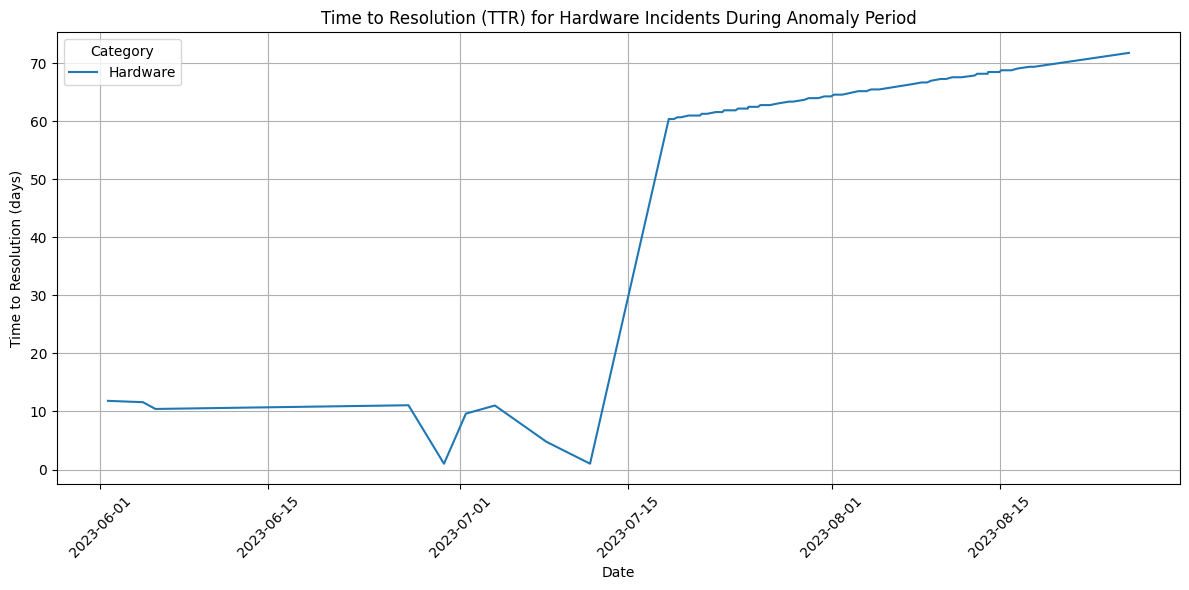

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering for Hardware category incidents
hardware_df = df[df['category'] == 'Hardware']

# Calculating TTR in days
hardware_df["ttr"] = (hardware_df["closed_at"] - hardware_df["opened_at"]).dt.total_seconds() / 86400

# Convert 'ttr' to numeric, handling errors
hardware_df["ttr"] = pd.to_numeric(hardware_df["ttr"], errors="coerce")

# Filtering data for the anomaly period
anomaly_period_df = hardware_df[(hardware_df['opened_at'] >= pd.Timestamp('2023-06-01')) & 
                                (hardware_df['opened_at'] <= pd.Timestamp('2023-08-31'))]

# Create a lineplot to show TTR trends during the anomaly period
plt.figure(figsize=(12, 6))
sns.lineplot(data=anomaly_period_df, x="opened_at", y="ttr", hue="category")
plt.title("Time to Resolution (TTR) for Hardware Incidents During Anomaly Period")
plt.xlabel("Date")
plt.ylabel("Time to Resolution (days)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Category')
plt.tight_layout()
plt.show()


#### Generate JSON Description for the Insight

In [12]:
{
    "data_type": "descriptive",
    "insight": "There is an increase in TTR for Hardware incidents during anomaly periods",
    "insight_value": {"x_val": "Anomaly Periods", "y_val": "Increased TTR"},
    "plot": {
        "plot_type": "line",
        "title": "TTR Trends for Hardware Incidents",
        "x_axis": {
            "name": "Time",
            "value": "Anomaly periods",
            "description": "This represents the specific anomaly periods identified."
        },
        "y_axis": {
            "name": "Time to Resolution",
            "value": "Dynamic based on data",
            "description": "This represents the time taken to resolve incidents, focusing on the Hardware category during anomaly periods."
        },
        "description": "The line graph demonstrates an increasing trend in the TTR for Hardware incidents during times of elevated incident frequency."
    },
    "question": "What is the trend in the time to resolution (TTR) for Hardware incidents, especially during the identified anomaly periods?",
    "actionable_insight": "Addressing the root causes of increased TTR during these periods could enhance overall service efficiency and customer satisfaction."
}

{'data_type': 'descriptive',
 'insight': 'There is an increase in TTR for Hardware incidents during anomaly periods',
 'insight_value': {'x_val': 'Anomaly Periods', 'y_val': 'Increased TTR'},
 'plot': {'plot_type': 'line',
  'title': 'TTR Trends for Hardware Incidents',
  'x_axis': {'name': 'Time',
   'value': 'Anomaly periods',
   'description': 'This represents the specific anomaly periods identified.'},
  'y_axis': {'name': 'Time to Resolution',
   'value': 'Dynamic based on data',
   'description': 'This represents the time taken to resolve incidents, focusing on the Hardware category during anomaly periods.'},
  'description': 'The line graph demonstrates an increasing trend in the TTR for Hardware incidents during times of elevated incident frequency.'},
 'question': 'What is the trend in the time to resolution (TTR) for Hardware incidents, especially during the identified anomaly periods?',
 'actionable_insight': 'Addressing the root causes of increased TTR during these periods 

### **Question 6**: Can we identify specific sub-categories or types of hardware that are most problematic during these anomaly periods?

#### Plot word clouds for problematic sub-categories or types within each categories
This cell creates a series of word clouds to visualize the most frequent terms within the 'short_description' of incidents for each category, specifically focusing on identifying problematic sub-categories or types during anomaly periods.

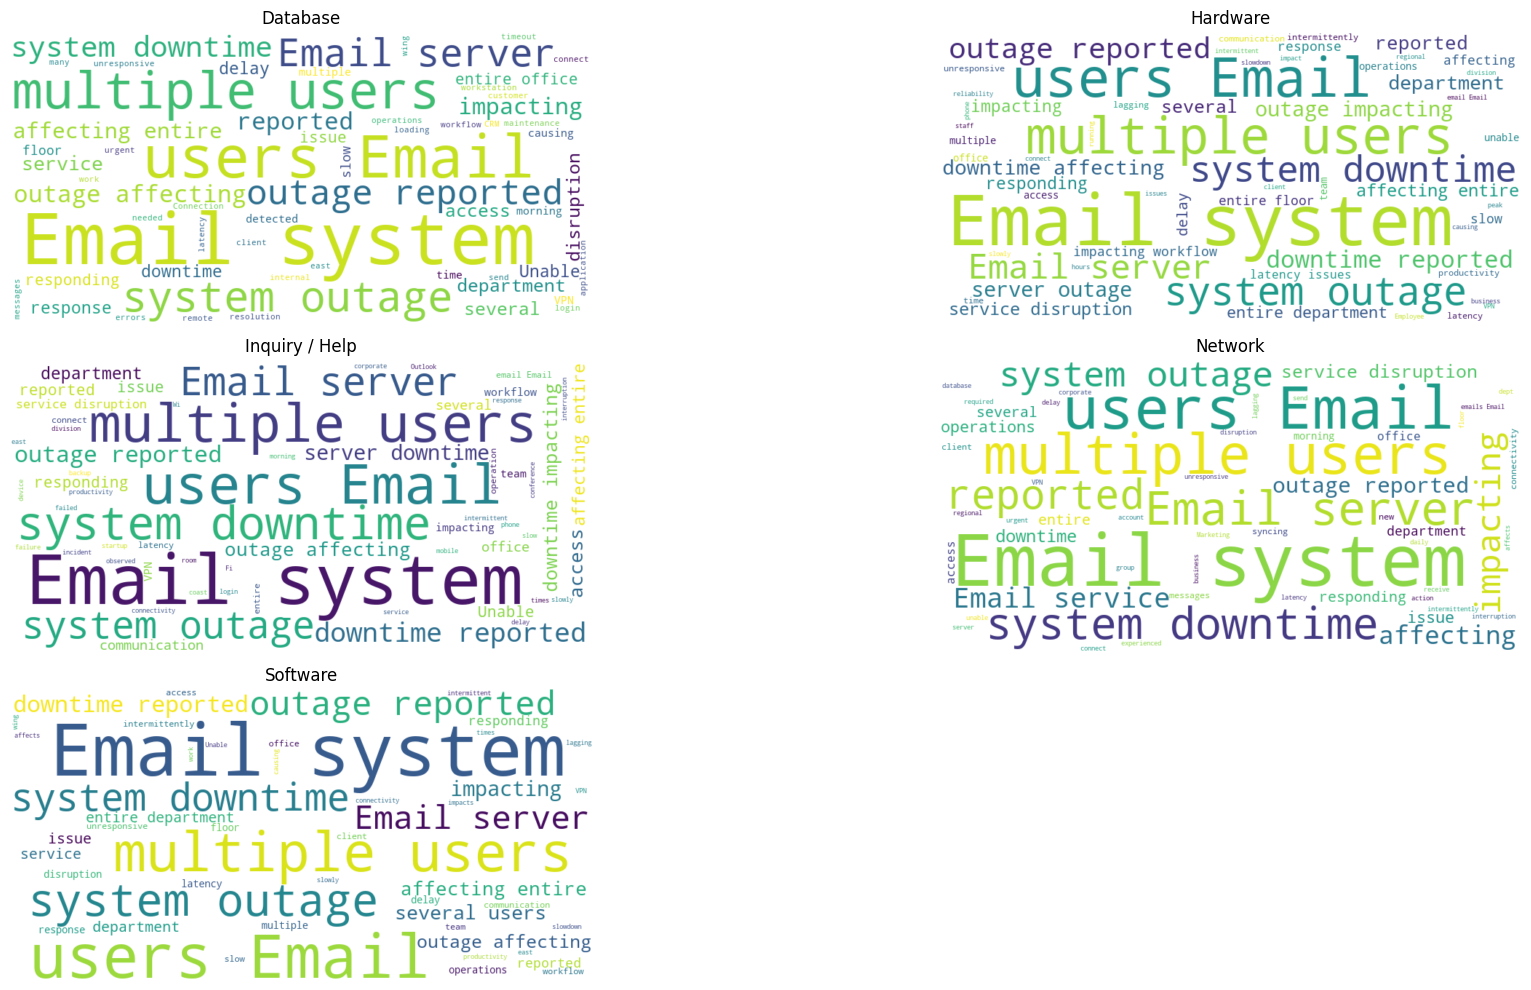

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


# Grouping the data by 'category' and concatenating 'short_description'
grouped_descriptions = df.groupby('category')['short_description'].apply(lambda x: ' '.join(x)).reset_index()

# Setting up the plot with appropriate size
plt.figure(figsize=(20, 10))

# Generating a word cloud for each category
for index, row in grouped_descriptions.iterrows():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(row['short_description'])
    
    plt.subplot(3, 2, index+1)  # Adjust the grid size according to the number of categories
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(row['category'])
    plt.axis('off')

plt.tight_layout()
plt.show()

#### Generate JSON Description for the Insight

In [14]:
{
    "data_type": "descriptive",
    "insight": "Specific system outage types identified as problematic during anomalies",
    "insight_value": {"x_val": "Hardware Type", "y_val": "Incident Count"},
    "plot": {
        "plot_type": "bar",
        "title": "Problematic Hardware Types During Anomaly Periods",
        "x_axis": {
            "name": "Hardware Type",
            "value": ["Email Servers", "System Outage"],
            "description": "This represents different types of hardware."
        },
        "y_axis": {
            "name": "Number of Incidents",
            "value": "Dynamic based on data",
            "description": "This shows the incident counts for problematic hardware types during the anomaly periods."
        },
        "description": "The word plot highlights specific hardware types that frequently fail or cause incidents during the anomaly periods."
    },
    "question": "Can we identify specific sub-categories or types of hardware that are most problematic during these anomaly periods?",
    "actionable_insight": "Focusing on the outage specific hardware types for maintenance or upgrades could mitigate the high incident rates."
}

{'data_type': 'descriptive',
 'insight': 'Specific system outage types identified as problematic during anomalies',
 'insight_value': {'x_val': 'Hardware Type', 'y_val': 'Incident Count'},
 'plot': {'plot_type': 'bar',
  'title': 'Problematic Hardware Types During Anomaly Periods',
  'x_axis': {'name': 'Hardware Type',
   'value': ['Email Servers', 'System Outage'],
   'description': 'This represents different types of hardware.'},
  'y_axis': {'name': 'Number of Incidents',
   'value': 'Dynamic based on data',
   'description': 'This shows the incident counts for problematic hardware types during the anomaly periods.'},
  'description': 'The word plot highlights specific hardware types that frequently fail or cause incidents during the anomaly periods.'},
 'question': 'Can we identify specific sub-categories or types of hardware that are most problematic during these anomaly periods?',
 'actionable_insight': 'Focusing on the outage specific hardware types for maintenance or upgrades c

### Summary of Findings (Flag 11)

1. **Increasing Trend in Resolution Time**: There is a noticeable linear increase in the Time to Resolution (TTR) for incidents within the Hardware category, starting from a specific date 2023-07-01. This trend suggests challenges in resolving these incidents efficiently.
2. **Cause of Increased TTR**: The linear increase in TTR coincides with an increase in the volume of hardware incidents. where there is spike number of hardware incidents between July and August months in 2023. This surge may be attributed to factors such as new hardware deployments, software updates, or external influences like peak usage times and increased demand.
3. **Location of the spikes**: Hardware incidents predominantly occur in Australia during spikes from 2023-06 to 2023-08.
4. **Reason and Impact Assessment**: The growing frequency and prolonged resolution times of hardware incidents is mostly due to email server outage issue and could strain resources and affect overall service delivery, highlighting the need for adjustment and repairs.